# Introduction to Python, Week 3: Extracting data from data frames

## Objectives
- review previous week's objectives

### Today:
- conditional subsetting
- grouping data
- visualizing data with pandas
- dealing with missing data

### Getting set up
- make sure folks are working in project directory with data/

In [1]:
# load pandas library
import pandas as pd

In [2]:
# read in data
clinical_df = pd.read_csv("data/clinical.csv") # import data as csv file

In [3]:
# inspect output
clinical_df.head()
len(clinical_df)

6832

## Conditional subsetting - extracting data based on criteria

In [4]:
# what samples are from patients born in 1930?
clinical_df.year_of_birth == 1930
# double equal signs to differentiate from variable assignment and parameter specification
# this gives true/false results

0       False
1       False
2       False
3        True
4       False
        ...  
6827    False
6828    False
6829    False
6830    False
6831    False
Name: year_of_birth, Length: 6832, dtype: bool

In [5]:
# conditional subsetting: all patients born in 1930
clinical_df[clinical_df.year_of_birth == 1930]

,primary_diagnosis,tumor_stage,age_at_diagnosis,vital_status,morphology,days_to_death,state,tissue_or_organ_of_origin,days_to_birth,site_of_resection_or_biopsy,days_to_last_follow_up,cigarettes_per_day,years_smoked,gender,year_of_birth,race,ethnicity,year_of_death,bcr_patient_barcode,disease
3,C34.1,stage ia,27154.0,alive,8083/3,NaN,live,C34.1,-27154.0,C34.1,3747.0,1.095890,NaN,male,1930.0,white,not hispanic or latino,NaN,TCGA-18-3409,LUSC
26,C34.3,stage ib,24253.0,alive,8070/3,NaN,live,C34.3,-24253.0,C34.3,3724.0,5.479452,NaN,male,1930.0,white,not hispanic or latino,NaN,TCGA-21-1080,LUSC
51,C34.1,stage iiia,26937.0,dead,8070/3,1057.0,live,C34.1,-26937.0,C34.1,1057.0,3.287671,NaN,female,1930.0,white,not reported,2005.0,TCGA-22-4601,LUSC
52,C34.1,stage iia,26952.0,dead,8070/3,399.0,live,C34.1,-26952.0,C34.1,NaN,2.739726,NaN,male,1930.0,white,not reported,2004.0,TCGA-22-4604,LUSC
57,C34.3,stage ib,27749.0,alive,8070/3,NaN,live,C34.3,-27749.0,C34.3,1845.0,2.739726,NaN,male,1930.0,white,not reported,NaN,TCGA-22-5471,LUSC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6640,C54.1,not reported,29771.0,dead,8380/3,130.0,live,C54.1,-29771.0,C54.1,130.0,NaN,NaN,female,1930.0,white,not hispanic or latino,NaN,TCGA-D1-A3DG,UCEC
6746,C54.1,not reported,28886.0,alive,8380/3,NaN,live,C54.1,-28886.0,C54.1,1803.0,NaN,NaN,female,1930.0,white,not hispanic or latino,NaN,TCGA-FI-A2F9,UCEC
6813,C54.9,not reported,26379.0,alive,8090/3,NaN,live,C54.9,-26379.0,C54.9,4269.0,NaN,NaN,female,1930.0,black or african american,not hispanic or latino,NaN,TCGA-NA-A4QV,UCS
6817,C54.3,not reported,29449.0,dead,8980/3,541.0,live,C54.3,-29449.0,C54.3,NaN,NaN,NaN,female,1930.0,white,not hispanic or latino,2011.0,TCGA-NA-A4R0,UCS


In [6]:
# all patients NOT born in 1930
clinical_df[clinical_df.year_of_birth != 1930]
# inverting the true/false results

,primary_diagnosis,tumor_stage,age_at_diagnosis,vital_status,morphology,days_to_death,state,tissue_or_organ_of_origin,days_to_birth,site_of_resection_or_biopsy,days_to_last_follow_up,cigarettes_per_day,years_smoked,gender,year_of_birth,race,ethnicity,year_of_death,bcr_patient_barcode,disease
0,C34.1,stage ia,24477.0,dead,8070/3,371.0,live,C34.1,-24477.0,C34.1,NaN,10.958904,NaN,male,1936.0,white,not hispanic or latino,2004.0,TCGA-18-3406,LUSC
1,C34.1,stage ib,26615.0,dead,8070/3,136.0,live,C34.1,-26615.0,C34.1,NaN,2.191781,NaN,male,1931.0,asian,not hispanic or latino,2003.0,TCGA-18-3407,LUSC
2,C34.3,stage ib,28171.0,dead,8070/3,2304.0,live,C34.3,-28171.0,C34.3,2099.0,1.643836,NaN,female,1927.0,white,not hispanic or latino,NaN,TCGA-18-3408,LUSC
4,C34.3,stage iib,29827.0,dead,8070/3,146.0,live,C34.3,-29827.0,C34.3,NaN,NaN,NaN,male,1923.0,not reported,not reported,2004.0,TCGA-18-3410,LUSC
5,C34.1,stage iiia,23370.0,alive,8070/3,NaN,live,C34.1,-23370.0,C34.1,3576.0,2.739726,NaN,female,1942.0,not reported,not reported,NaN,TCGA-18-3411,LUSC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6827,C55,not reported,32871.0,dead,8950/3,167.0,live,C55.9,-32871.0,C55.9,NaN,NaN,NaN,female,1917.0,white,not reported,2007.0,TCGA-NF-A5CP,UCS
6828,C54.1,not reported,23323.0,dead,8950/3,442.0,live,C54.1,-23323.0,C54.1,NaN,NaN,NaN,female,1948.0,white,not hispanic or latino,2012.0,TCGA-NG-A4VU,UCS
6829,C54.1,not reported,27326.0,dead,8950/3,949.0,live,C54.1,-27326.0,C54.1,NaN,NaN,NaN,female,1932.0,white,not hispanic or latino,2008.0,TCGA-NG-A4VW,UCS
6830,C54.1,not reported,24781.0,alive,8950/3,NaN,live,C54.1,-24781.0,C54.1,587.0,NaN,NaN,female,1945.0,white,not hispanic or latino,NaN,TCGA-QM-A5NM,UCS


In [7]:
# combining criteria: AND
clinical_df[(clinical_df.year_of_birth >= 1930) & (clinical_df.year_of_birth <= 1940)]

,primary_diagnosis,tumor_stage,age_at_diagnosis,vital_status,morphology,days_to_death,state,tissue_or_organ_of_origin,days_to_birth,site_of_resection_or_biopsy,days_to_last_follow_up,cigarettes_per_day,years_smoked,gender,year_of_birth,race,ethnicity,year_of_death,bcr_patient_barcode,disease
0,C34.1,stage ia,24477.0,dead,8070/3,371.0,live,C34.1,-24477.0,C34.1,NaN,10.958904,NaN,male,1936.0,white,not hispanic or latino,2004.0,TCGA-18-3406,LUSC
1,C34.1,stage ib,26615.0,dead,8070/3,136.0,live,C34.1,-26615.0,C34.1,NaN,2.191781,NaN,male,1931.0,asian,not hispanic or latino,2003.0,TCGA-18-3407,LUSC
3,C34.1,stage ia,27154.0,alive,8083/3,NaN,live,C34.1,-27154.0,C34.1,3747.0,1.095890,NaN,male,1930.0,white,not hispanic or latino,NaN,TCGA-18-3409,LUSC
7,C34.3,stage iv,26938.0,dead,8070/3,716.0,live,C34.3,-26938.0,C34.3,NaN,1.369863,NaN,male,1932.0,asian,not hispanic or latino,2006.0,TCGA-18-3414,LUSC
11,C34.3,stage iib,26813.0,alive,8070/3,NaN,live,C34.3,-26813.0,C34.3,2811.0,2.739726,NaN,male,1934.0,not reported,not reported,NaN,TCGA-18-3419,LUSC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6813,C54.9,not reported,26379.0,alive,8090/3,NaN,live,C54.9,-26379.0,C54.9,4269.0,NaN,NaN,female,1930.0,black or african american,not hispanic or latino,NaN,TCGA-NA-A4QV,UCS
6817,C54.3,not reported,29449.0,dead,8980/3,541.0,live,C54.3,-29449.0,C54.3,NaN,NaN,NaN,female,1930.0,white,not hispanic or latino,2011.0,TCGA-NA-A4R0,UCS
6818,C55,not reported,27688.0,dead,8980/3,203.0,live,C55.9,-27688.0,C55.9,NaN,NaN,NaN,female,1937.0,black or african american,not hispanic or latino,2012.0,TCGA-NA-A4R1,UCS
6823,C54.3,not reported,28398.0,dead,8950/3,167.0,live,C54.3,-28398.0,C54.3,NaN,NaN,NaN,female,1930.0,white,not hispanic or latino,2007.0,TCGA-ND-A4WF,UCS


In [8]:
# combining subsetting: OR
clinical_df[(clinical_df.year_of_birth == 1930) | (clinical_df.year_of_birth == 1931)]

,primary_diagnosis,tumor_stage,age_at_diagnosis,vital_status,morphology,days_to_death,state,tissue_or_organ_of_origin,days_to_birth,site_of_resection_or_biopsy,days_to_last_follow_up,cigarettes_per_day,years_smoked,gender,year_of_birth,race,ethnicity,year_of_death,bcr_patient_barcode,disease
1,C34.1,stage ib,26615.0,dead,8070/3,136.0,live,C34.1,-26615.0,C34.1,NaN,2.191781,NaN,male,1931.0,asian,not hispanic or latino,2003.0,TCGA-18-3407,LUSC
3,C34.1,stage ia,27154.0,alive,8083/3,NaN,live,C34.1,-27154.0,C34.1,3747.0,1.095890,NaN,male,1930.0,white,not hispanic or latino,NaN,TCGA-18-3409,LUSC
26,C34.3,stage ib,24253.0,alive,8070/3,NaN,live,C34.3,-24253.0,C34.3,3724.0,5.479452,NaN,male,1930.0,white,not hispanic or latino,NaN,TCGA-21-1080,LUSC
51,C34.1,stage iiia,26937.0,dead,8070/3,1057.0,live,C34.1,-26937.0,C34.1,1057.0,3.287671,NaN,female,1930.0,white,not reported,2005.0,TCGA-22-4601,LUSC
52,C34.1,stage iia,26952.0,dead,8070/3,399.0,live,C34.1,-26952.0,C34.1,NaN,2.739726,NaN,male,1930.0,white,not reported,2004.0,TCGA-22-4604,LUSC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6690,C54.1,not reported,29260.0,alive,8380/3,NaN,live,C54.1,-29260.0,C54.1,1170.0,NaN,NaN,female,1931.0,white,hispanic or latino,NaN,TCGA-EO-A3KX,UCEC
6746,C54.1,not reported,28886.0,alive,8380/3,NaN,live,C54.1,-28886.0,C54.1,1803.0,NaN,NaN,female,1930.0,white,not hispanic or latino,NaN,TCGA-FI-A2F9,UCEC
6813,C54.9,not reported,26379.0,alive,8090/3,NaN,live,C54.9,-26379.0,C54.9,4269.0,NaN,NaN,female,1930.0,black or african american,not hispanic or latino,NaN,TCGA-NA-A4QV,UCS
6817,C54.3,not reported,29449.0,dead,8980/3,541.0,live,C54.3,-29449.0,C54.3,NaN,NaN,NaN,female,1930.0,white,not hispanic or latino,2011.0,TCGA-NA-A4R0,UCS


**Challenge:** print to the screen all data from clinical_df for patients with stage ia tumors who live more than 365 days

## Grouping - evaluting data available for a variable (column of categorical data)

In [9]:
# what categories exist for race?
# identify number of unique elements in a column
pd.unique(clinical_df["race"])

array(['white', 'asian', 'not reported', 'black or african american', nan,
       'american indian or alaska native',
       'native hawaiian or other pacific islander'], dtype=object)

In [10]:
pd.unique(clinical_df.race) # same as above, specifying column differently

array(['white', 'asian', 'not reported', 'black or african american', nan,
       'american indian or alaska native',
       'native hawaiian or other pacific islander'], dtype=object)

In [11]:
# how can we summarize data by category?
# group data by race (object isn't interpretable by us)
grouped_data = clinical_df.groupby("race")
# note: we can't specify race as an attribute here because of the syntax of the method groupby

In [12]:
# summary stats for all columns by race
grouped_data.describe()
# only summarizes for quantitative variables, gives summary stats for each column grouped by race

age_at_diagnosis                \
                                                     count          mean   
race                                                                       
american indian or alaska native                      15.0  18653.400000   
asian                                                299.0  21743.906355   
black or african american                            575.0  21970.570435   
native hawaiian or other pacific islander             12.0  19740.000000   
not reported                                        1082.0  23870.847505   
white                                               4735.0  22062.366631   

                                                                           \
                                                   std      min       25%   
race                                                                        
american indian or alaska native           4803.399954   7855.0  16817.50   
asian                                      4925.857739   6572.0  18681.50   
black or african american                  5037.715451   6377.0  18577.50   
native hawaiian or other pacific islander  3433.788181  14225.0  17718.00   
not reported                               4128.186661   5303.0  21427.25   
white                                      5223.048363   3982.0  18771.00   

                                                                       \
                                               50%       75%      max   
race                                                                    
american indian or alaska native           19423.0  21279.00  28472.0   
asian                                      21428.0  25789.00  32872.0   
black or african american                  22372.0  25804.00  32872.0   
native hawaiian or other pacific islander  20124.0  21709.75  24981.0   
not reported                               24134.5  26453.75  32872.0   
white                                      22642.0  25929.00  32872.0   

                                          days_to_death              ...  \
                                                  count        mean  ...   
race                                                                 ...   
american indian or alaska native                    3.0  277.333333  ...   
asian                                              67.0  514.880597  ...   
black or african american                         179.0  893.726257  ...   
native hawaiian or other pacific islander           4.0  753.000000  ...   
not reported                                      204.0  715.009804  ...   
white                                            1730.0  911.302312  ...   

                                          year_of_birth         year_of_death  \
                                                    75%     max         count   
race                                                                            
american indian or alaska native                 1965.0  1977.0           3.0   
asian                                            1961.0  1991.0          27.0   
black or african american                        1959.0  1991.0         131.0   
native hawaiian or other pacific islander        1960.0  1969.0           3.0   
not reported                                     1951.0  1988.0         147.0   
white                                            1957.0  1993.0        1255.0   

                                                                          \
                                                  mean       std     min   
race                                                                       
american indian or alaska native           2006.000000  7.937254  1997.0   
asian                                      2006.703704  3.244105  1999.0   
black or african american                  2006.809160  4.665940  1992.0   
native hawaiian or other pacific islander  2006.000000  3.464102  2002.0   
not reported                               2006.115646  4.

In [13]:
# summary stats for race for only one column (race)
grouped_data.race.describe()

,count,unique,top,freq
race,,,,
american indian or alaska native,15,1,american indian or alaska native,15
asian,316,1,asian,316
black or african american,581,1,black or african american,581
native hawaiian or other pacific islander,12,1,native hawaiian or other pacific islander,12
not reported,1116,1,not reported,1116
white,4753,1,white,4753


In [14]:
# show the number of patients for each race available for all columns (only one summary stat from above)
grouped_data.count()

,primary_diagnosis,tumor_stage,age_at_diagnosis,vital_status,morphology,days_to_death,state,tissue_or_organ_of_origin,days_to_birth,site_of_resection_or_biopsy,days_to_last_follow_up,cigarettes_per_day,years_smoked,gender,year_of_birth,ethnicity,year_of_death,bcr_patient_barcode,disease
race,,,,,,,,,,,,,,,,,,,
american indian or alaska native,15,15,15,15,15,3,15,15,15,15,12,2,0,15,15,15,3,15,15
asian,316,316,299,316,316,67,316,316,299,316,296,27,6,316,315,316,27,316,316
black or african american,581,581,575,581,581,179,581,581,575,581,474,72,24,581,579,581,131,581,581
native hawaiian or other pacific islander,12,12,12,12,12,4,12,12,12,12,9,1,0,12,12,12,3,12,12
not reported,1116,1116,1082,1116,1116,204,1116,1116,1082,1116,976,226,138,1116,1011,1116,147,1116,1116
white,4753,4753,4735,4753,4753,1730,4753,4753,4735,4753,3947,843,280,4753,4730,4753,1255,4753,4753


In [15]:
# for only one column
grouped_data.race.count()

race
american indian or alaska native               15
asian                                         316
black or african american                     581
native hawaiian or other pacific islander      12
not reported                                 1116
white                                        4753
Name: race, dtype: int64

In [16]:
# count the number of each race for which days to death data is available
grouped_data.days_to_death.count()
# how does this differ from the last command?

race
american indian or alaska native                3
asian                                          67
black or african american                     179
native hawaiian or other pacific islander       4
not reported                                  204
white                                        1730
Name: days_to_death, dtype: int64

In [17]:
# only display one race (asian), from days_to_death grouped by race
grouped_data.days_to_death.count().asian

67

In [18]:
# remember this is synonymous with:
clinical_df.groupby("race")["days_to_death"].count()["asian"]
# this second command differs because of the data object (clinical_df) and the syntax for identifying columns

67

In [19]:
# save output to object for later use
race_counts = grouped_data.days_to_death.count()
print(race_counts) # see script-friendly output

race
american indian or alaska native                3
asian                                          67
black or african american                     179
native hawaiian or other pacific islander       4
not reported                                  204
white                                        1730
Name: days_to_death, dtype: int64


**Challenge:**
- Write code that will display the number of patients in this dataset who are listed as alive

## Visualizing data with pandas

In [20]:
# Make sure figures appear inline in some interfaces
%matplotlib inline
# can also use plt.show()

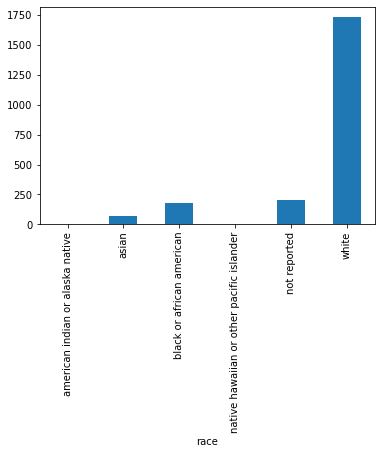

In [21]:
# Create a quick bar chart of number of patients with race known
race_counts.plot(kind="bar");
# the semicolon suppresses the output, allowing the plot to show

## BREAK

**Challenge:**
- create a new object called total_count that counts the number of samples for each cancer type (disease)

In [22]:
total_count = clinical_df.groupby("disease")["disease"].count()
total_count

disease
BLCA     412
BRCA    1098
CESC     307
COAD     461
GBM      617
LGG      516
LUSC    1008
MESO      87
PRAD     500
READ     172
SKCM     470
STAD     443
THYM     124
UCEC     560
UCS       57
Name: disease, dtype: int64

In [23]:
total_count = clinical_df.groupby("disease").disease.count() # same as above
total_count

disease
BLCA     412
BRCA    1098
CESC     307
COAD     461
GBM      617
LGG      516
LUSC    1008
MESO      87
PRAD     500
READ     172
SKCM     470
STAD     443
THYM     124
UCEC     560
UCS       57
Name: disease, dtype: int64

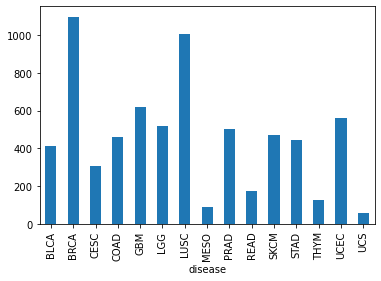

In [24]:
# plot the number of samples for each cancer type
total_count.plot(kind="bar");

## Missing data: replacing data in copied df

In [25]:
## replace missing data in copied data frame
# create new copy of data frame
birth_replace = clinical_df.copy()

In [26]:
# look for missing data in a single column
birth_replace[pd.isnull(birth_replace.year_of_birth)]

,primary_diagnosis,tumor_stage,age_at_diagnosis,vital_status,morphology,days_to_death,state,tissue_or_organ_of_origin,days_to_birth,site_of_resection_or_biopsy,days_to_last_follow_up,cigarettes_per_day,years_smoked,gender,year_of_birth,race,ethnicity,year_of_death,bcr_patient_barcode,disease
260,C34.1,stage ib,NaN,dead,8070/3,NaN,live,C34.1,NaN,C34.1,NaN,NaN,NaN,male,NaN,not reported,not reported,NaN,TCGA-63-5128,LUSC
261,C34.9,stage iib,NaN,dead,8070/3,NaN,live,C34.9,NaN,C34.9,NaN,2.739726,NaN,male,NaN,not reported,not reported,NaN,TCGA-63-5131,LUSC
262,C34.1,stage iia,NaN,alive,8070/3,NaN,live,C34.1,NaN,C34.1,1602.0,1.917808,35.0,male,NaN,not reported,not reported,NaN,TCGA-63-6202,LUSC
263,C34.1,stage ia,NaN,alive,8070/3,NaN,live,C34.1,NaN,C34.1,2133.0,2.739726,53.0,male,NaN,not reported,not reported,NaN,TCGA-63-7020,LUSC
264,C34.1,stage ia,NaN,alive,8070/3,NaN,live,C34.1,NaN,C34.1,2142.0,1.150685,52.0,male,NaN,not reported,not reported,NaN,TCGA-63-7021,LUSC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6647,C54.1,not reported,NaN,alive,8380/3,NaN,live,C54.1,NaN,C54.1,3067.0,NaN,NaN,female,NaN,not reported,not reported,NaN,TCGA-DF-A2KU,UCEC
6648,C54.1,not reported,20160.0,alive,8380/3,NaN,live,C54.1,-20160.0,C54.1,2717.0,NaN,NaN,female,NaN,not reported,not reported,NaN,TCGA-DF-A2KV,UCEC
6649,C54.1,not reported,18086.0,alive,8380/3,NaN,live,C54.1,-18086.0,C54.1,332.0,NaN,NaN,female,NaN,not reported,not reported,NaN,TCGA-DF-A2KY,UCEC
6650,C54.1,not reported,31973.0,alive,8380/3,NaN,live,C54.1,-31973.0,C54.1,826.0,NaN,NaN,female,NaN,not reported,not reported,NaN,TCGA-DF-A2KZ,UCEC


In [27]:
# fill missing values with 0 (this makes an obvious change we'll be able to track visually)
birth_replace.year_of_birth = birth_replace.year_of_birth.fillna(0)

In [28]:
# filling with 0 gives different answer for mean! not a good approach for work where summary stats matter later in the analysis
birth_replace.year_of_birth.mean()

1899.0999707259953

In [29]:
clinical_df.year_of_birth.mean()

1947.560942659862

In [30]:
# fill NaN with mean for all weight values
birth_replace.year_of_birth = birth_replace.year_of_birth.fillna(birth_replace.year_of_birth.mean())
# this won't do anything since we've already replaced all missing data!
birth_replace.year_of_birth.mean()

1899.0999707259953

In [31]:
# Optional: can convert between data types, but is difficult without dealing with missing data
# convert the age_at_diagnosis from an float to integer
birth_replace.year_of_birth = birth_replace.year_of_birth.astype("int64")

In [32]:
birth_replace.year_of_birth.dtype

dtype('int64')

In [33]:
#clinical_df.year_of_birth.astype("int64") # gives error because of missing data

## Missing data: masking

In [34]:
# mask: excluding missing values

# extract all rows values WITHOUT missing data
clinical_df.dropna()

,primary_diagnosis,tumor_stage,age_at_diagnosis,vital_status,morphology,days_to_death,state,tissue_or_organ_of_origin,days_to_birth,site_of_resection_or_biopsy,days_to_last_follow_up,cigarettes_per_day,years_smoked,gender,year_of_birth,race,ethnicity,year_of_death,bcr_patient_barcode,disease
24,C34.3,stage ib,28125.0,dead,8070/3,474.0,live,C34.3,-28125.0,C34.3,469.0,0.493151,59.0,male,1929.0,white,not hispanic or latino,2007.0,TCGA-21-1078,LUSC
30,C34.3,stage ib,24969.0,dead,8070/3,962.0,live,C34.3,-24969.0,C34.3,962.0,2.630137,51.0,female,1936.0,white,not hispanic or latino,2006.0,TCGA-21-5782,LUSC
34,C34.1,stage iiia,24071.0,dead,8070/3,329.0,live,C34.1,-24071.0,C34.1,329.0,5.479452,53.0,male,1944.0,black or african american,not hispanic or latino,2009.0,TCGA-21-5787,LUSC
36,C34.9,stage iia,26272.0,dead,8070/3,669.0,live,C34.9,-26272.0,C34.9,608.0,1.369863,24.0,male,1929.0,white,not hispanic or latino,2001.0,TCGA-22-0940,LUSC
39,C34.9,stage ia,25359.0,dead,8070/3,131.0,live,C34.9,-25359.0,C34.9,131.0,4.657534,49.0,male,1932.0,white,not hispanic or latino,2001.0,TCGA-22-1002,LUSC
40,C34.9,stage ia,23322.0,dead,8070/3,1953.0,live,C34.9,-23322.0,C34.9,1953.0,2.191781,45.0,male,1938.0,white,not hispanic or latino,2006.0,TCGA-22-1005,LUSC
43,C34.9,stage ib,24078.0,dead,8070/3,822.0,live,C34.9,-24078.0,C34.9,802.0,2.191781,30.0,male,1936.0,white,not hispanic or latino,2003.0,TCGA-22-1016,LUSC
46,C34.3,stage iia,28385.0,dead,8070/3,1067.0,live,C34.3,-28385.0,C34.3,1067.0,1.643836,60.0,male,1925.0,white,not reported,2004.0,TCGA-22-4593,LUSC
49,C34.1,stage ib,25448.0,dead,8070/3,17.0,live,C34.1,-25448.0,C34.1,17.0,2.191781,40.0,female,1933.0,white,not reported,2002.0,TCGA-22-4596,LUSC
54,C34.3,stage ib,27601.0,dead,8070/3,587.0,live,C34.3,-27601.0,C34.3,587.0,1.095890,20.0,male,1928.0,white,not reported,2004.0,TCGA-22-4607,LUSC


In [35]:
len(clinical_df.dropna())
# filtering for any missing data cuts out a lot of the dataset!

50

In [36]:
# optional: can also do this with .isnull
clinical_df[-pd.isnull(clinical_df).any(axis=1)] # axis specifies if missing data is removed by rows or columns

,primary_diagnosis,tumor_stage,age_at_diagnosis,vital_status,morphology,days_to_death,state,tissue_or_organ_of_origin,days_to_birth,site_of_resection_or_biopsy,days_to_last_follow_up,cigarettes_per_day,years_smoked,gender,year_of_birth,race,ethnicity,year_of_death,bcr_patient_barcode,disease
24,C34.3,stage ib,28125.0,dead,8070/3,474.0,live,C34.3,-28125.0,C34.3,469.0,0.493151,59.0,male,1929.0,white,not hispanic or latino,2007.0,TCGA-21-1078,LUSC
30,C34.3,stage ib,24969.0,dead,8070/3,962.0,live,C34.3,-24969.0,C34.3,962.0,2.630137,51.0,female,1936.0,white,not hispanic or latino,2006.0,TCGA-21-5782,LUSC
34,C34.1,stage iiia,24071.0,dead,8070/3,329.0,live,C34.1,-24071.0,C34.1,329.0,5.479452,53.0,male,1944.0,black or african american,not hispanic or latino,2009.0,TCGA-21-5787,LUSC
36,C34.9,stage iia,26272.0,dead,8070/3,669.0,live,C34.9,-26272.0,C34.9,608.0,1.369863,24.0,male,1929.0,white,not hispanic or latino,2001.0,TCGA-22-0940,LUSC
39,C34.9,stage ia,25359.0,dead,8070/3,131.0,live,C34.9,-25359.0,C34.9,131.0,4.657534,49.0,male,1932.0,white,not hispanic or latino,2001.0,TCGA-22-1002,LUSC
40,C34.9,stage ia,23322.0,dead,8070/3,1953.0,live,C34.9,-23322.0,C34.9,1953.0,2.191781,45.0,male,1938.0,white,not hispanic or latino,2006.0,TCGA-22-1005,LUSC
43,C34.9,stage ib,24078.0,dead,8070/3,822.0,live,C34.9,-24078.0,C34.9,802.0,2.191781,30.0,male,1936.0,white,not hispanic or latino,2003.0,TCGA-22-1016,LUSC
46,C34.3,stage iia,28385.0,dead,8070/3,1067.0,live,C34.3,-28385.0,C34.3,1067.0,1.643836,60.0,male,1925.0,white,not reported,2004.0,TCGA-22-4593,LUSC
49,C34.1,stage ib,25448.0,dead,8070/3,17.0,live,C34.1,-25448.0,C34.1,17.0,2.191781,40.0,female,1933.0,white,not reported,2002.0,TCGA-22-4596,LUSC
54,C34.3,stage ib,27601.0,dead,8070/3,587.0,live,C34.3,-27601.0,C34.3,587.0,1.095890,20.0,male,1928.0,white,not reported,2004.0,TCGA-22-4607,LUSC


In [37]:
len(clinical_df[-pd.isnull(clinical_df).any(axis=1)])

50

In [38]:
# exclude missing data in only days to death
clinical_df.dropna(subset = ["cigarettes_per_day"])

,primary_diagnosis,tumor_stage,age_at_diagnosis,vital_status,morphology,days_to_death,state,tissue_or_organ_of_origin,days_to_birth,site_of_resection_or_biopsy,days_to_last_follow_up,cigarettes_per_day,years_smoked,gender,year_of_birth,race,ethnicity,year_of_death,bcr_patient_barcode,disease
0,C34.1,stage ia,24477.0,dead,8070/3,371.0,live,C34.1,-24477.0,C34.1,NaN,10.958904,NaN,male,1936.0,white,not hispanic or latino,2004.0,TCGA-18-3406,LUSC
1,C34.1,stage ib,26615.0,dead,8070/3,136.0,live,C34.1,-26615.0,C34.1,NaN,2.191781,NaN,male,1931.0,asian,not hispanic or latino,2003.0,TCGA-18-3407,LUSC
2,C34.3,stage ib,28171.0,dead,8070/3,2304.0,live,C34.3,-28171.0,C34.3,2099.0,1.643836,NaN,female,1927.0,white,not hispanic or latino,NaN,TCGA-18-3408,LUSC
3,C34.1,stage ia,27154.0,alive,8083/3,NaN,live,C34.1,-27154.0,C34.1,3747.0,1.095890,NaN,male,1930.0,white,not hispanic or latino,NaN,TCGA-18-3409,LUSC
5,C34.1,stage iiia,23370.0,alive,8070/3,NaN,live,C34.1,-23370.0,C34.1,3576.0,2.739726,NaN,female,1942.0,not reported,not reported,NaN,TCGA-18-3411,LUSC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4414,C34.3,stage iii,21182.0,dead,8070/3,387.0,live,C34.3,-21182.0,C34.3,NaN,0.164384,30.0,female,1949.0,white,not hispanic or latino,2007.0,TCGA-O2-A52S,LUSC
4415,C34.1,stage ii,27449.0,dead,8070/3,1335.0,live,C34.1,-27449.0,C34.1,NaN,0.054795,20.0,female,1931.0,black or african american,not hispanic or latino,2009.0,TCGA-O2-A52V,LUSC
4416,C34.2,stage i,23156.0,dead,8070/3,261.0,live,C34.2,-23156.0,C34.2,NaN,0.136986,50.0,male,1943.0,black or african american,not hispanic or latino,2006.0,TCGA-O2-A52W,LUSC
4417,C34.2,stage iii,26211.0,dead,8070/3,340.0,live,C34.2,-26211.0,C34.2,NaN,0.136986,50.0,female,1934.0,white,not hispanic or latino,2005.0,TCGA-O2-A5IB,LUSC


In [39]:
# assign masked results to new name (masking doesn't interfere with original data)
smoke_complete = clinical_df.dropna(subset = ["cigarettes_per_day"])

In [40]:
# apply additional filter for age at diagnosis
smoke_complete = smoke_complete[smoke_complete.age_at_diagnosis > 0]

In [41]:
# save filtered data to file
smoke_complete.to_csv("data/smoke_complete.csv", index=False) # index=False stops index value from being printed before first column
# this is the first of two datasets we'll use next week!

In [42]:
## use masking to create second dataframe for next week

# reference original data
birth_reduced = clinical_df

**Challenge:**
- filter out missing data for year of birth and vital status

In [43]:
birth_reduced = birth_reduced.dropna(subset = ["year_of_birth", "vital_status"])

In [44]:
# another option:
birth_reduced = birth_reduced[-pd.isnull(birth_reduced.year_of_birth)]
birth_reduced = birth_reduced[-pd.isnull(birth_reduced.vital_status)]

In [45]:
# check to see that it worked
pd.unique(birth_reduced.vital_status)

array(['dead', 'alive', 'not reported'], dtype=object)

**Challenge:**
- remove "not reported" from vital status

In [46]:
birth_reduced = birth_reduced[birth_reduced.vital_status != "not reported"]

In [47]:
pd.unique(birth_reduced.vital_status)

array(['dead', 'alive'], dtype=object)

In [48]:
## count number of samples for each cancer type group by disease and count
dis_counts = birth_reduced.groupby("disease").disease.count()
dis_counts

disease
BLCA     394
BRCA    1094
CESC     305
COAD     459
GBM      594
LGG      515
LUSC     958
MESO      87
PRAD     469
READ     170
SKCM     459
STAD     437
THYM     123
UCEC     539
UCS       57
Name: disease, dtype: int64

In [49]:
# reset index to default (because of groupby)
dis_counts = dis_counts.reset_index(name="counts")
dis_counts

,disease,counts
0,BLCA,394
1,BRCA,1094
2,CESC,305
3,COAD,459
4,GBM,594
5,LGG,515
6,LUSC,958
7,MESO,87
8,PRAD,469
9,READ,170


In [50]:
# keep only diseases with many observations
dis_counts = dis_counts[dis_counts.counts > 500]
dis_counts

,disease,counts
1,BRCA,1094
4,GBM,594
5,LGG,515
6,LUSC,958
13,UCEC,539


In [51]:
# extract values
birth_reduced = birth_reduced[birth_reduced["disease"].isin(dis_counts.disease)]
birth_reduced.head()

,primary_diagnosis,tumor_stage,age_at_diagnosis,vital_status,morphology,days_to_death,state,tissue_or_organ_of_origin,days_to_birth,site_of_resection_or_biopsy,days_to_last_follow_up,cigarettes_per_day,years_smoked,gender,year_of_birth,race,ethnicity,year_of_death,bcr_patient_barcode,disease
0,C34.1,stage ia,24477.0,dead,8070/3,371.0,live,C34.1,-24477.0,C34.1,NaN,10.958904,NaN,male,1936.0,white,not hispanic or latino,2004.0,TCGA-18-3406,LUSC
1,C34.1,stage ib,26615.0,dead,8070/3,136.0,live,C34.1,-26615.0,C34.1,NaN,2.191781,NaN,male,1931.0,asian,not hispanic or latino,2003.0,TCGA-18-3407,LUSC
2,C34.3,stage ib,28171.0,dead,8070/3,2304.0,live,C34.3,-28171.0,C34.3,2099.0,1.643836,NaN,female,1927.0,white,not hispanic or latino,NaN,TCGA-18-3408,LUSC
3,C34.1,stage ia,27154.0,alive,8083/3,NaN,live,C34.1,-27154.0,C34.1,3747.0,1.095890,NaN,male,1930.0,white,not hispanic or latino,NaN,TCGA-18-3409,LUSC
4,C34.3,stage iib,29827.0,dead,8070/3,146.0,live,C34.3,-29827.0,C34.3,NaN,NaN,NaN,male,1923.0,not reported,not reported,2004.0,TCGA-18-3410,LUSC


In [52]:
# write data to csv
birth_reduced.to_csv("data/birth_reduced.csv", index=False)

## Wrapping up
- review objectives
- preview next week's objectives
- check install for next week: import plotnine as p9
- demo use of Atom + Hydrogen to code in Python